In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
# Image preprocessing - converted to Gray scale

input_folder = '360 Rocks/'
output_folder = '360 Grey_Rocks/'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        output_path = os.path.join(output_folder, f"gray_{filename}")
        cv2.imwrite(output_path, gray_img)


In [6]:
# Image Preprocessing - downsized to size 500 x 500

input_folder = '360 Grey_Rocks/'

output_folder = '360 Grey_Downsized_Rocks/'
os.makedirs(output_folder, exist_ok=True)

new_width = 500
new_height = 500

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        resized_img = cv2.resize(img, (new_width, new_height))

        output_path = os.path.join(output_folder, f"downsized_{filename}")
        cv2.imwrite(output_path, resized_img)



In [7]:
# Load images
# Example assuming all images are of the same size (width, height)
image_folder = '360 Grey_Downsized_Rocks/'
images = [cv2.imread(image_folder + img) for img in os.listdir(image_folder)]

In [8]:
# Flatten images
flattened_images = [img.flatten() for img in images]
data = np.array(flattened_images)

In [9]:
# Standardize data (optional)
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

/var/folders/cq/7p9yk4gs30s3l4fmtlttqwkm0000gn/T/ipykernel_12029/1059023360.py:2: RuntimeWarning: invalid value encountered in divide
  data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)


In [10]:
# Checking the structure of data_standardised 

print("Type")
print(type(data_standardized))

print("Number of instances")
print(len(data_standardized))

print("Number of features")
print(len(data_standardized[0]))

# Find columns with null values
columns_with_null = np.isnan(data_standardized).any(axis=0)

# Remove columns with null values from all images
data_no_null = data_standardized[:, ~columns_with_null]

# Print the shape before and after removing null columns
print("Shape before removing null columns:", data_standardized.shape)
print("Shape after removing null columns:", data_no_null.shape)

Type
<class 'numpy.ndarray'>
Number of instances
360
Number of features
750000
Shape before removing null columns: (360, 750000)
Shape after removing null columns: (360, 748731)


In [11]:
# Question - 1. PCA

pca = PCA()
reduced_data = pca.fit_transform(data_no_null)

PCA()

In [12]:
# Question - 1. Number of Component required to preserve 95 % variance.

# Find the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to preserve 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to preserve 95% variance:", n_components)


Number of components to preserve 95% variance: 218


In [41]:
# Function to load and display images from a folder
def load_and_display_images(folder, num_images):
    images = []
    plt.figure(figsize=(50, 5))
    for filename in os.listdir(folder)[:num_images]:
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)
            plt.subplot(2, num_images, len(images))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(f"Image {filename}",fontsize = 13)
    return np.array(images)

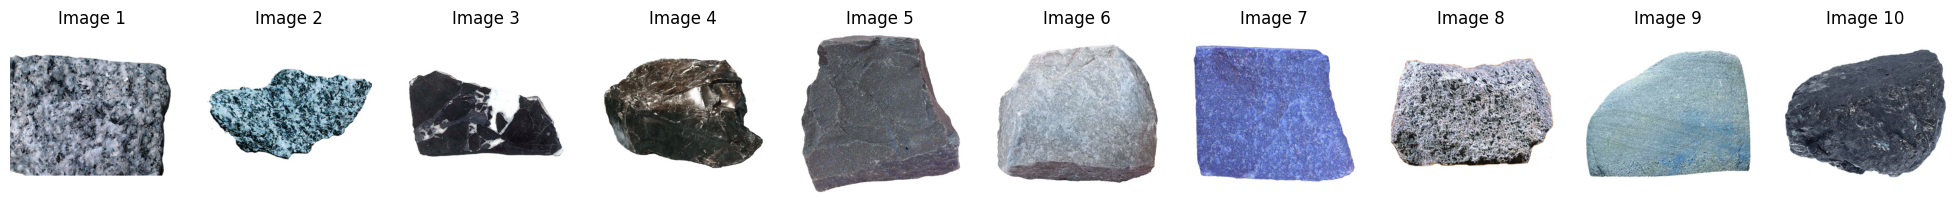

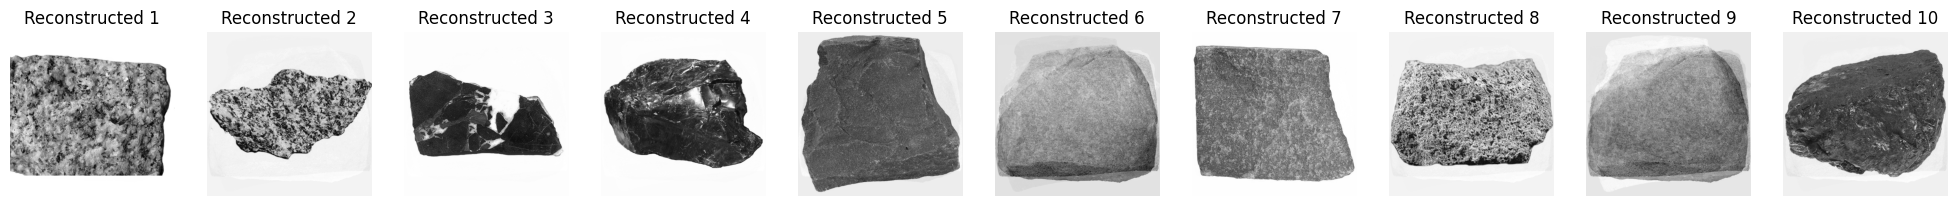

In [47]:
# Q2- 10 images in original from and their reconstruction

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to load and display images from a folder
def load_and_display_images(folder, num_images):
    images = []
    for idx, filename in enumerate(os.listdir(folder)[:num_images], 1):
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)
    return np.array(images)

def load_and_display_images_display(folder, num_images):
    images = []
    plt.figure(figsize=(25, 5))
    for idx, filename in enumerate(os.listdir(folder)[:num_images], 1):
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            images.append(img)
            plt.subplot(2, num_images, idx)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(f"Image {idx}")
    return np.array(images)

# Function to apply PCA and reconstruct images
def apply_pca_and_reconstruct(images):
    flattened_images = images.reshape(images.shape[0], -1)
    pca = PCA(0.95)  # Keep 95% of variance
    reduced_data = pca.fit_transform(flattened_images)
    reconstructed_images = pca.inverse_transform(reduced_data)
    return reconstructed_images.reshape(images.shape)

# Folder containing your images
image_folder = '360 Rocks/'

# Number of images to display and reconstruct
num_images = 10

# Load and display original images
load_and_display_images_display(image_folder, num_images)

original_images = load_and_display_images(image_folder, num_images)

# Apply PCA and reconstruct images
reconstructed_images = apply_pca_and_reconstruct(original_images)

# Display reconstructed images
plt.figure(figsize=(25, 5))
for i in range(num_images):
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Reconstructed {i + 1}")

plt.show()



In [50]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_no_null)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Principal components
print("Principal Components:\n", principal_components)

Explained Variance Ratio: [0.18612946 0.12683531]
Principal Components:
 [[-1.76603731e+02 -5.81686053e+01]
 [ 2.24942514e+02 -4.42654091e+02]
 [ 1.73939579e+02 -3.10160563e+02]
 [ 2.02406260e+02 -2.35852299e+02]
 [-2.66469746e+02  2.44834488e+02]
 [-7.90411990e+02  1.02523881e+02]
 [-1.33275264e+02  5.76111858e+02]
 [-5.91030190e+01  1.24556545e+02]
 [ 4.19924414e+01 -8.25985124e+01]
 [ 6.21200998e+02 -3.85593242e+01]
 [ 1.00199321e+01 -2.89648147e+01]
 [-2.31168446e+02  5.25557044e+02]
 [-4.11777780e+02 -8.82492995e+01]
 [-3.55503895e+02  8.28746930e+00]
 [-1.72824933e+02  4.23810181e+02]
 [ 3.17126301e+00  9.66091782e+02]
 [-2.82437937e+02  1.05215501e+02]
 [ 4.63260489e+02 -4.55924300e+02]
 [ 8.26434756e+01  8.84985052e+02]
 [ 6.17296205e+02  4.83566341e+02]
 [-1.21524010e+01 -9.87489095e+01]
 [ 8.44969836e+02  5.27834551e+02]
 [ 2.60636827e+01  8.51737082e+00]
 [-3.66624216e+02 -4.98644963e+00]
 [-1.99930553e+01 -3.39703378e+02]
 [-3.02965048e+02  3.91513167e+01]
 [ 2.53846711e+02

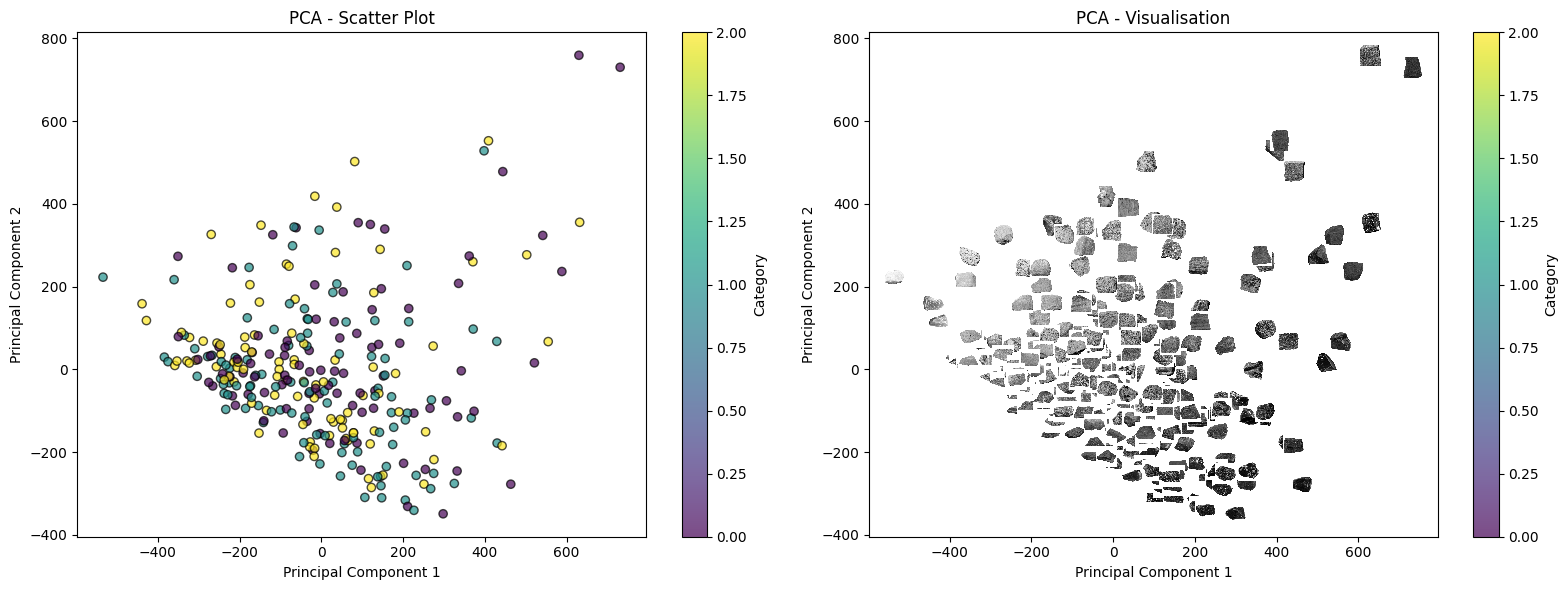

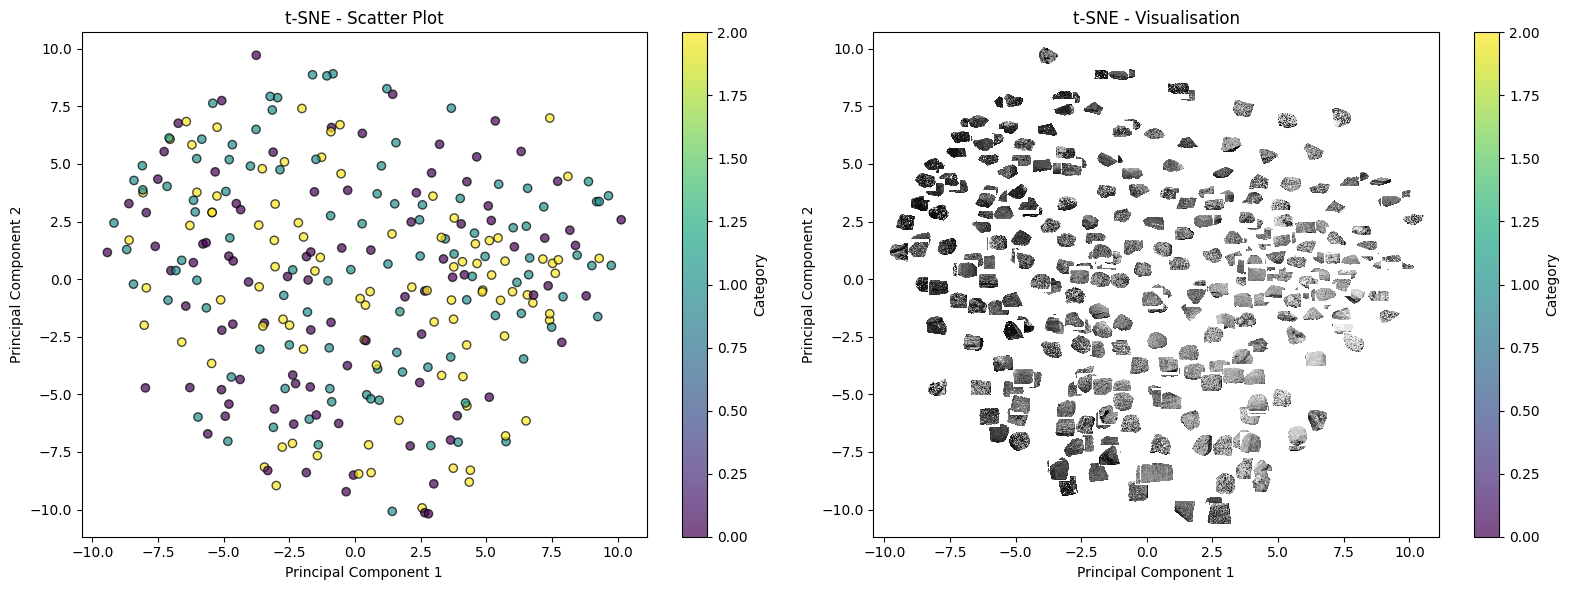

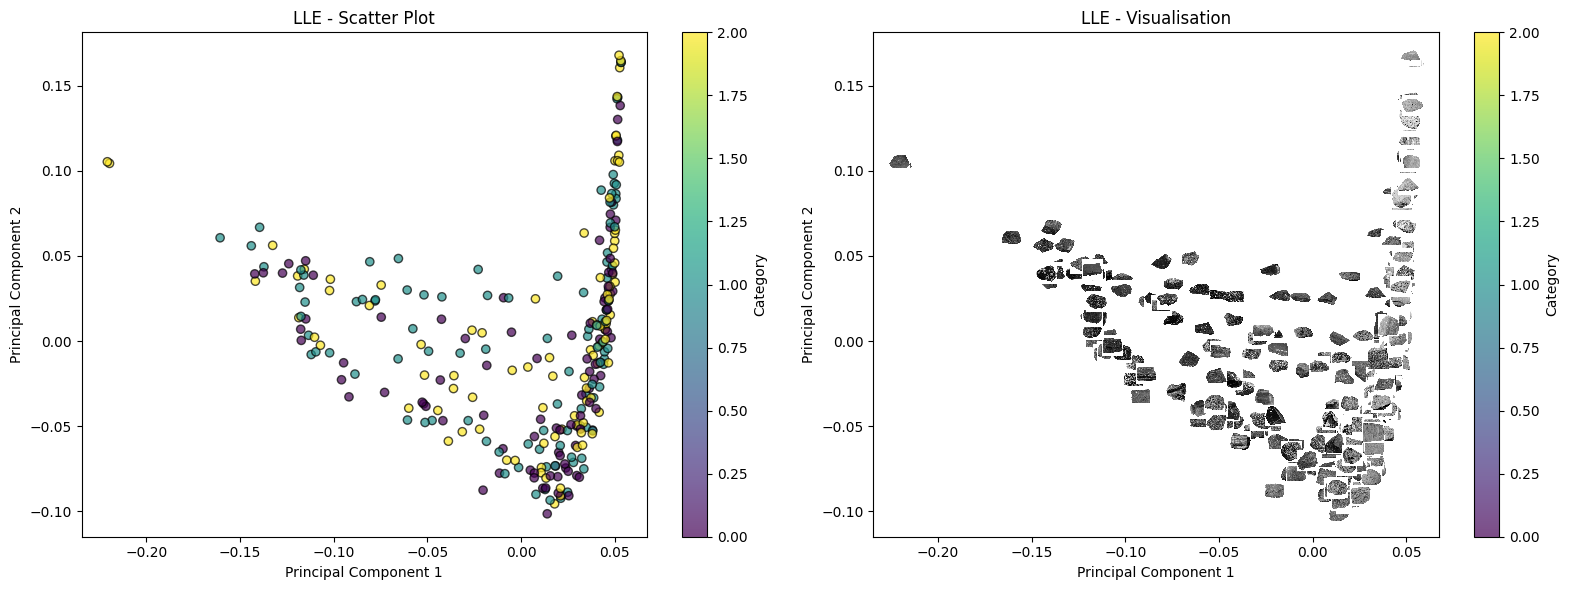

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


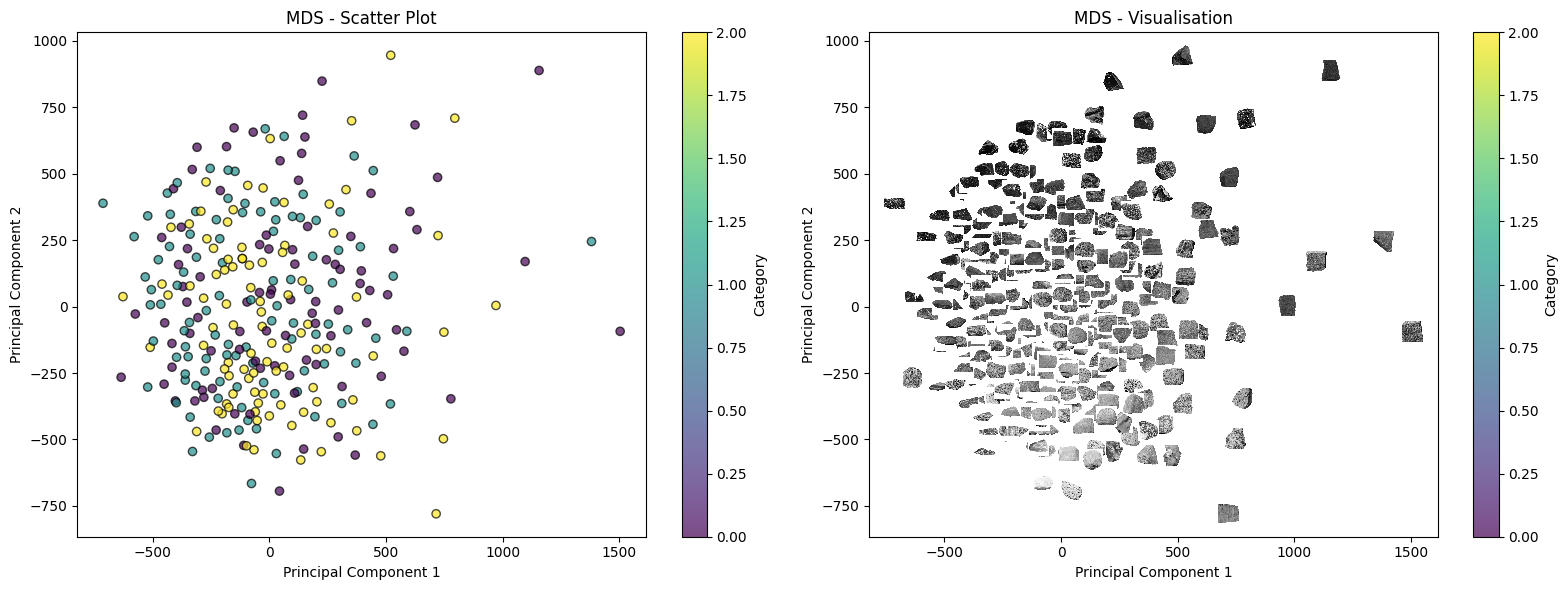

In [96]:
import os
import cv2
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Function to load images from a folder and return data (X) and labels (y)
def load_images_from_folder(folder):
    images = []
    labels = []
    label_encoder = LabelEncoder()

    for filename in os.listdir(folder):
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
            images.append(img.flatten())  # Flatten the images

            # Extract label from filename using regex
            label = filename.split("_")[2]  # Assuming the label is in the third part of the filename
            labels.append(label)

    # Use LabelEncoder to encode labels to integer values
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    return np.array(images), np.array(encoded_labels)

# Function to display images on the scatter plot
def plot_images_on_scatter(images, coordinates, ax):
    for img, (x, y) in zip(images, coordinates):
        imagebox = OffsetImage(img.reshape((500, 500)), zoom=0.03, cmap='gray')
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        ax.add_artist(ab)

# Function to plot 2D scatter plot for a given dimensionality reduction technique
def plot_2d_scatter(X_2d, y, title, images=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', marker='o', alpha=0.7, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Category')

# Function to plot 2D scatter plot for a given dimensionality reduction technique
def plot_2d_scatter_visualisation(X_2d, y, title, images=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', marker='o', alpha=0.7, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Category')

    if images is not None:
        plot_images_on_scatter(images, X_2d, ax)

# Function to apply dimensionality reduction and plot results
def apply_dimensionality_reduction_and_plot(    X, y, reduction_method, title):
    X_std = StandardScaler().fit_transform(X)

    if reduction_method == 'PCA':
        reducer = PCA(n_components=2)
    elif reduction_method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    elif reduction_method == 'LLE':
        reducer = LocallyLinearEmbedding(n_components=2, random_state=42)
    elif reduction_method == 'MDS':
        reducer = MDS(n_components=2, random_state=42)
    else:
        raise ValueError('Invalid reduction method')

    X_reduced = reducer.fit_transform(X_std)

    # Create 4x2 subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes = axes.flatten()

    # Plot the scatter plot and its visualization for each subplot
    for i in range(2):
        if i % 2 == 0:
            plot_2d_scatter(X_reduced, y, f'{title} - Scatter Plot', images=X, ax=axes[i])
        else:
            plot_2d_scatter_visualisation(X_reduced, y, f'{title} - Visualisation', images=X, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Specify the path to your image folder
folder_path = '360 Grey_Downsized_Rocks/'  # Replace with the actual path to your image folder

# Load images and labels from the folder
images, labels = load_images_from_folder(folder_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Apply dimensionality reduction and plot results
apply_dimensionality_reduction_and_plot(X_train, y_train, 'PCA', 'PCA')
apply_dimensionality_reduction_and_plot(X_train, y_train, 't-SNE', 't-SNE')
apply_dimensionality_reduction_and_plot(X_train, y_train, 'LLE', 'LLE')
apply_dimensionality_reduction_and_plot(X_train, y_train, 'MDS', 'MDS')


In [115]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from scipy.spatial import procrustes
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load image data (replace 'your_image_folder' with the actual path to your image folder)
# Use the load_images_from_folder function from a previous code snippet
# to load images and labels from a folder

# Apply dimensionality reduction techniques
def apply_dimensionality_reduction(X, method, n_components):
    if method == 'pca':
        reducer = PCA(n_components=n_components)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42, method='exact')
    elif method == 'lle':
        reducer = LocallyLinearEmbedding(n_components=n_components, random_state=42)
    elif method == 'mds':
        reducer = MDS(n_components=n_components, random_state=42)
    else:
        raise ValueError("Invalid dimensionality reduction method")

    X_reduced = reducer.fit_transform(X)
    return X_reduced

# Load human data from mds_360.txt
human_data = np.loadtxt('mds_360.txt')

# Number of components for dimensionality reduction
n_components = 8

# List to store results
results = []

# List of dimensionality reduction methods
methods = ['pca', 'tsne', 'lle', 'mds']

# Iterate over dimensionality reduction methods
for method in methods:
    # Apply dimensionality reduction to image data

    X_reduced = apply_dimensionality_reduction(images, method, n_components)

    # Standardize the human data and the reduced image data
    scaler = StandardScaler()
    human_data_std = scaler.fit_transform(human_data)
    X_reduced_std = scaler.transform(X_reduced)

    # Procrustes analysis
    _, _, disparity = procrustes(human_data_std, X_reduced_std)

    # Compute correlation coefficients
    correlations = np.corrcoef(human_data_std.T, X_reduced_std.T)[:n_components, n_components:]

    # Store results
    result_dict = {
        'Method': method,
        'Disparity': disparity,
        'Correlation_Coefficients': correlations.flatten()
    }
    results.append(result_dict)

# Display results in a DataFrame
pd.set_option('display.max_columns', None)
results_df = pd.DataFrame(results)
results_df.head()


# plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,Method,Disparity,Correlation_Coefficients
0,pca,0.988415,"[-0.027489846107322188, -0.021539004975744847,..."
1,tsne,0.986064,"[0.1413965440869553, 0.033207198490572645, 0.0..."
2,lle,0.983223,"[-0.02206340430721042, -0.0038561023482981418,..."
3,mds,0.987655,"[-0.05972917690326379, 0.008115074015651846, -..."


In [117]:
import tensorflow as tf

w1, w2 = tf.Variable(5.), tf.Variable(3.)
def f(w1, w2):
    return tf.stop_gradient(3 * w1 ** 2) + 2 * w1 * w2

with tf.GradientTape() as tape:
    z = f(w1,w2)

gradients = tape.gradient(z, [w1,w2])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]
